In [185]:
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

In [186]:
results_df = pd.read_csv('auction_detailed_log.csv')
print(results_df.columns)

Index(['ItemNumber', 'ItemTime', 'BidAmount'], dtype='object')


In [187]:
results_df

,ItemNumber,ItemTime,BidAmount
0,1,6.2,480.96
1,1,21.0,485.77
2,1,27.8,490.62
3,1,33.6,495.53
4,1,35.9,500.48
...,...,...,...
12931,1000,57.4,537.74
12932,1000,57.6,543.12
12933,1000,57.8,548.55
12934,1000,59.3,554.04


In [188]:
# Calculate the average number of bids
aggregated_items = results_df.groupby('ItemNumber').size().reset_index(name='count')

normalizer = len(aggregated_items)
print('Normalizer:', normalizer)

aggregated_items.head()

Normalizer: 945


,ItemNumber,count
0,1,24
1,2,1
2,3,10
3,4,20
4,5,28


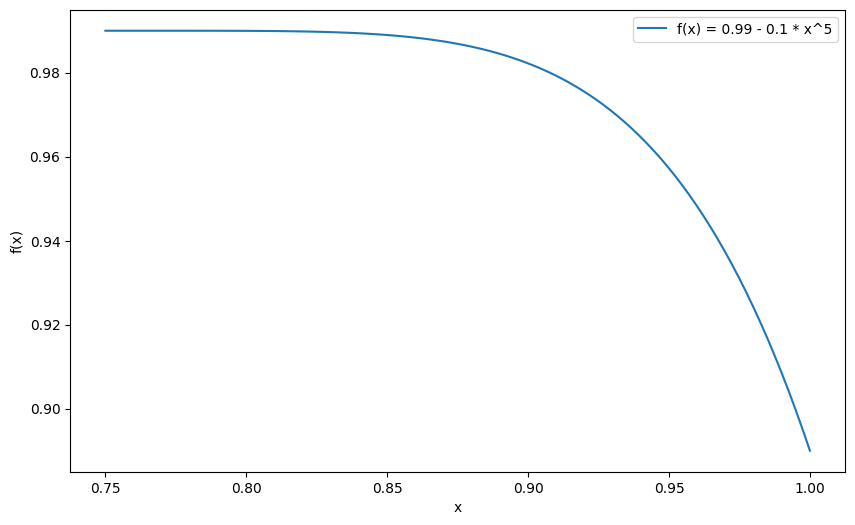

In [189]:
# Define the function
def func(x):
    x = (x - 0.75) / 0.25
    return 0.99 - 0.1 * pow(x, 5)

fig, axs = plt.subplots(1, 1, figsize=(10, 6))
x = np.linspace(0.75, 1, 100)
y = func(x)
axs.plot(x, y, label='f(x) = 0.99 - 0.1 * x^5')
axs.set_xlabel('x')
axs.set_ylabel('f(x)')
axs.legend()


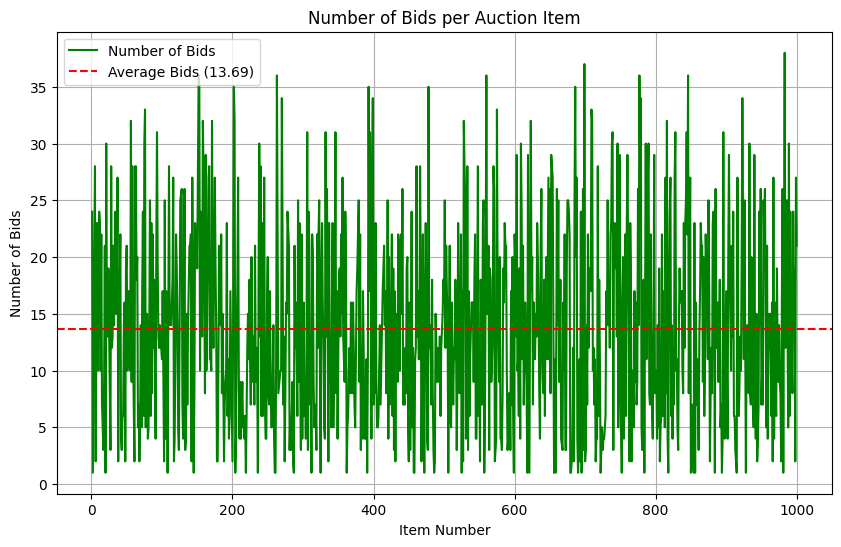

In [190]:
# Plotting the data
fig, axs = plt.subplots(1, 1, figsize=(10, 6))

# Plot the number of bids per item
axs.plot(aggregated_items['ItemNumber'], aggregated_items['count'], color="green", label='Number of Bids')

# Calculate the average number of bids
average_bids = aggregated_items['count'].mean()

# Plot the average number of bids
axs.axhline(y=average_bids, color='red', linestyle='dashed', label=f'Average Bids ({average_bids:.2f})')

# Adding labels and title
axs.set_xlabel('Item Number')
axs.set_ylabel('Number of Bids')
axs.set_title('Number of Bids per Auction Item')

# Adding grid
axs.grid(True)

# Adding legend
axs.legend()

# Display the plot
plt.show()

<Axes: xlabel='count', ylabel='Count'>

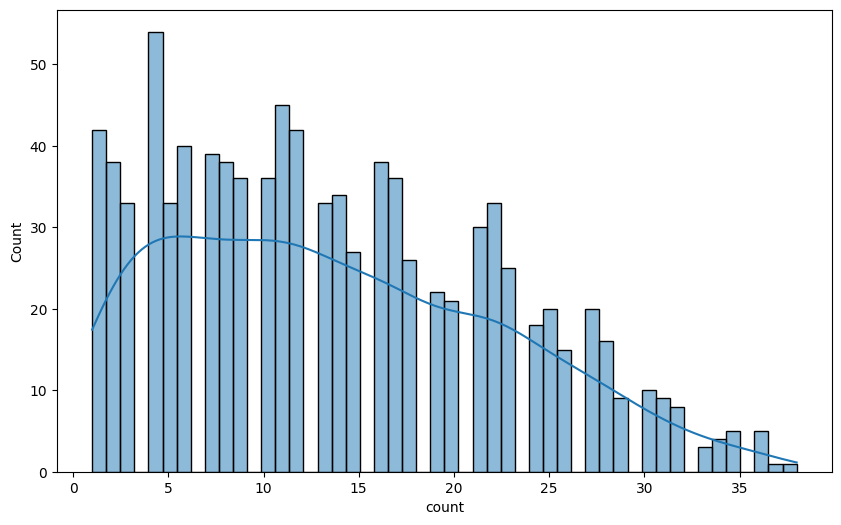

In [191]:
fig, axs = plt.subplots(1, 1, figsize=(10, 6))
sns.histplot(aggregated_items['count'], bins=50, kde=True, ax=axs)

In [192]:
time_aggregated = results_df.groupby('ItemTime').size().reset_index(name='count')
time_aggregated

,ItemTime,count
0,1.7,1
1,2.1,2
2,2.2,1
3,2.4,1
4,2.5,1
...,...,...
566,59.6,137
567,59.7,135
568,59.8,174
569,59.9,177


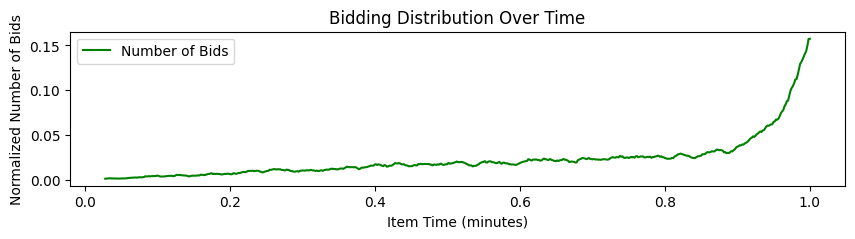

In [193]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming time_aggregated is already defined and contains 'ItemTime' and 'count' columns

# Calculate the rolling average to smooth the data
time_aggregated['smoothed_count'] = time_aggregated['count'].rolling(window=10, min_periods=1).mean()

# Bidding distribution in the auction
fig, axs = plt.subplots(1, 1, figsize=(10, 2))

# Plotting the data as a line plot with smoothed data
axs.plot(time_aggregated['ItemTime'] / 60, time_aggregated['smoothed_count'] / normalizer, color="green", label='Number of Bids')

# Adding labels and title
axs.set_xlabel('Item Time (minutes)')
axs.set_ylabel('Normalized Number of Bids')
axs.set_title('Bidding Distribution Over Time')

# Adding legend
axs.legend()

# Display the plot
plt.show()

In [194]:
# Overlay ebay auction data with our data
ebay_df = pd.read_csv('ebay.csv')

In [195]:
ebay_df

,auctionid,bid,bidtime,bidder,bidderrate,openbid,price,item,auction_type
0,1638893549,175.00,2.230949,schadenfreud,0.0,99.00,177.50,Cartier wristwatch,3 day auction
1,1638893549,100.00,2.600116,chuik,0.0,99.00,177.50,Cartier wristwatch,3 day auction
2,1638893549,120.00,2.600810,kiwisstuff,2.0,99.00,177.50,Cartier wristwatch,3 day auction
3,1638893549,150.00,2.601076,kiwisstuff,2.0,99.00,177.50,Cartier wristwatch,3 day auction
4,1638893549,177.50,2.909826,eli.flint@flightsafety.co,4.0,99.00,177.50,Cartier wristwatch,3 day auction
...,...,...,...,...,...,...,...,...,...
10676,8214889177,61.00,6.359155,714ark,15.0,0.01,90.01,Xbox game console,7 day auction
10677,8214889177,76.00,6.359294,rjdorman,1.0,0.01,90.01,Xbox game console,7 day auction
10678,8214889177,90.00,6.428738,baylorjeep,3.0,0.01,90.01,Xbox game console,7 day auction
10679,8214889177,88.00,6.760081,jasonjasonparis,18.0,0.01,90.01,Xbox game console,7 day auction


In [196]:
ebay_df = ebay_df.dropna()
# Only keep distinc auctionids
ebay_df_counts = ebay_df.drop_duplicates(subset='auctionid')
# Group by auction type
counts_df = ebay_df_counts.groupby('auction_type').size().reset_index(name='count')
counts_df

,auction_type,count
0,3 day auction,148
1,5 day auction,96
2,7 day auction,383


In [197]:
auctions_3_days = ebay_df.where(ebay_df['auction_type'].str.contains("3 day auction"))
auctions_3_days = auctions_3_days.dropna()
auctions_3_days_len = len(auctions_3_days.groupby('auctionid'))
print('3 day auctions:', auctions_3_days_len)

3 day auctions: 148


In [198]:
auctions_3_days

,auctionid,bid,bidtime,bidder,bidderrate,openbid,price,item,auction_type
0,1.638894e+09,175.00,2.230949,schadenfreud,0.0,99.0,177.50,Cartier wristwatch,3 day auction
1,1.638894e+09,100.00,2.600116,chuik,0.0,99.0,177.50,Cartier wristwatch,3 day auction
2,1.638894e+09,120.00,2.600810,kiwisstuff,2.0,99.0,177.50,Cartier wristwatch,3 day auction
3,1.638894e+09,150.00,2.601076,kiwisstuff,2.0,99.0,177.50,Cartier wristwatch,3 day auction
4,1.638894e+09,177.50,2.909826,eli.flint@flightsafety.co,4.0,99.0,177.50,Cartier wristwatch,3 day auction
...,...,...,...,...,...,...,...,...,...
8422,8.215611e+09,31.00,2.385764,misschicfashion,13.0,5.0,35.09,Xbox game console,3 day auction
8423,8.215611e+09,32.01,2.385926,misschicfashion,13.0,5.0,35.09,Xbox game console,3 day auction
8424,8.215611e+09,32.00,2.592141,minipc1,104.0,5.0,35.09,Xbox game console,3 day auction
8425,8.215611e+09,35.09,2.973264,bebawl,114.0,5.0,35.09,Xbox game console,3 day auction


In [199]:
auctions_3_days.loc[:, 'bidtime'] = auctions_3_days['bidtime'].round(1)
auctions_3_days = auctions_3_days.groupby('bidtime').size().reset_index(name='count')

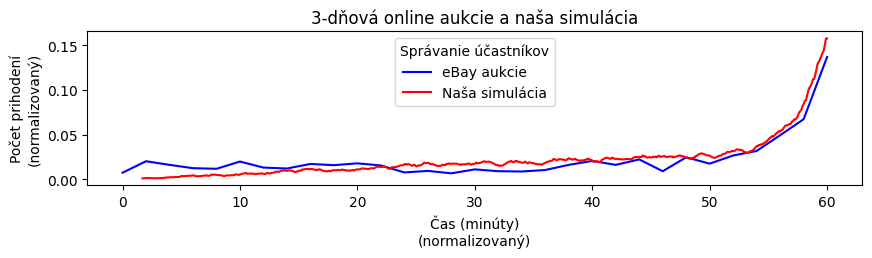

In [206]:
fig, axs = plt.subplots(1, 1, figsize=(10, 2))
plt.subplots_adjust(hspace=0.75)

# Plot 3-day auctions
axs.plot(auctions_3_days['bidtime'] * 20, auctions_3_days['count'] / (auctions_3_days_len * 20) , color='blue', label='eBay aukcie')
axs.plot(time_aggregated['ItemTime'], time_aggregated['smoothed_count'] / normalizer, color='red', label='Naša simulácia')
axs.set_ylabel('Počet prihodení\n(normalizovaný)')
axs.set_xlabel('Čas (minúty)\n(normalizovaný)')
axs.set_title('3-dňová online aukcie a naša simulácia')
legend = axs.legend(loc='upper center', bbox_to_anchor=(0.5, 1))
legend.set_title('Správanie účastníkov')
plt.show()
